<a href="https://colab.research.google.com/github/iborgstedt2848/ML_G84_G2_P2/blob/main/segunda_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Práctica

**Autores:**

---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

# Scalers

Primero, vamos a visualizar los diferentes scalers: MinMaxScaler, StandardScaler, y RobustScaler usando gráficos que muestran los clusters. Después, podemos elegir el mejor basado en las métricas y los gráficos.

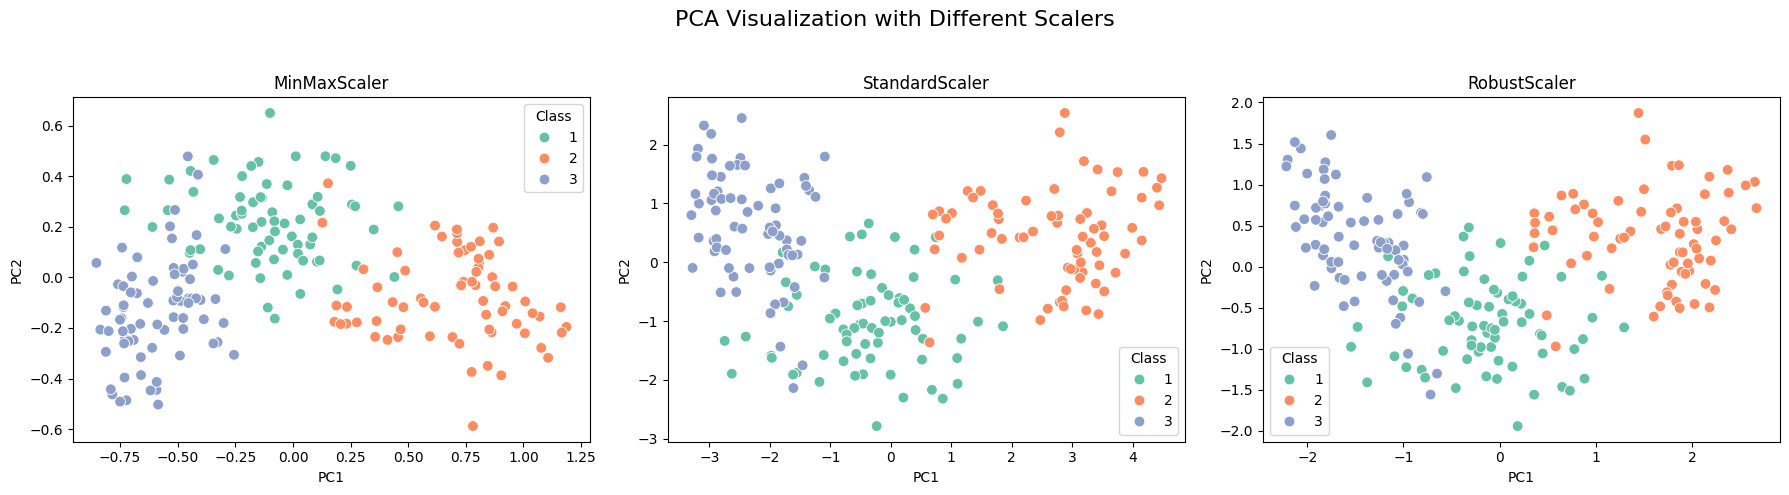

          PC1       PC2
0    0.222314 -0.451988
1    0.132084 -1.217733
2   -0.028215 -1.368021
3   -0.139683 -1.337110
4    0.881124 -1.364596
..        ...       ...
205 -1.080211 -0.696041
206 -1.675987  0.056040
207 -0.798936  0.641682
208 -1.436453 -0.116253
209 -1.168643  0.217147

[210 rows x 2 columns]


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# cargar los datos
df = pd.read_csv("semillas.csv")
X = df.drop(columns=['clase'])
y = df['clase']

# semilla para la reproducibilidad
random_seed = 559990

# dictionario de scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PCA Visualization with Different Scalers', fontsize=16)

# probar cada scaler y realizar PCA
for ax, (name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_pca = pipeline.fit_transform(X)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['class'] = y

    sns.scatterplot(
        data=pca_df,
        x='PC1', y='PC2',
        hue='class',
        palette='Set2',
        ax=ax,
        s=60
    )

    ax.set_title(name)
    ax.legend().set_title('Class')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# datafram final de 2 dimensions sin la columna de clases
df_final = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_final)

También podemos calcular la efectivdad de cada scaler con las métricas Silhouette Score, Davies-Bounldin Index, y Calinski Harabasz score para obtener una respuesta más objetiva del rendimiento de los scalers.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

results = []

for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_scaled_pca = pipeline.fit_transform(X)

    # correr kmeans con k=3
    kmeans = KMeans(n_clusters=3, random_state=random_seed)
    labels = kmeans.fit_predict(X_scaled_pca)

    # evaluar las métricas
    silhouette = silhouette_score(X_scaled_pca, labels)
    db_index = davies_bouldin_score(X_scaled_pca, labels)
    ch_index = calinski_harabasz_score(X_scaled_pca, labels)

    results.append({
        'Scaler': name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Index': ch_index
    })

# convertirse en df
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Silhouette Score', ascending=False))


           Scaler  Silhouette Score  Davies-Bouldin Index  \
0    MinMaxScaler          0.503160              0.697186   
1  StandardScaler          0.493430              0.706673   
2    RobustScaler          0.489777              0.699397   

   Calinski-Harabasz Index  
0               464.844797  
1               397.301078  
2               360.897259  


Silhouette Score: Mide qué tan bien se ajusta un punto a su propio clúster en comparación con otros clusters. Los valores cercanos a 1 indican un mejor agrupamiento.

Davies-Bouldin Index: Mide la similitud promedio entre cada cluster y el cluster más similar. Cuanto menor sea el valor, mejor.

Calinski-Harabasz Index: Relación entre la dispersión entre clusters y la dispersión interna de los clusters. Cuanto mayor sea el valor, mejor.

Todos las métricas muestran que MinMaxScaler es el mejor porque tiene el Silhouette Score más alto, el Davies-Bouldin Index más bajo, t el Calinski-Harabasz Index más alto.

# K-Means

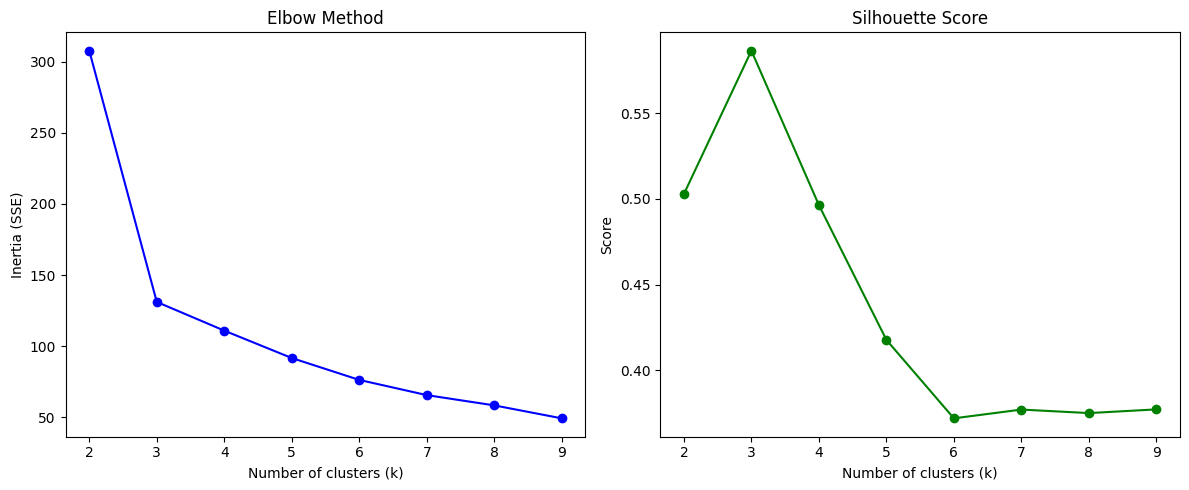

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [15]:
k_best = 3  # replace with the optimal number you choose
kmeans = KMeans(n_clusters=k_best, random_state=42)
kmeans.fit(pca_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


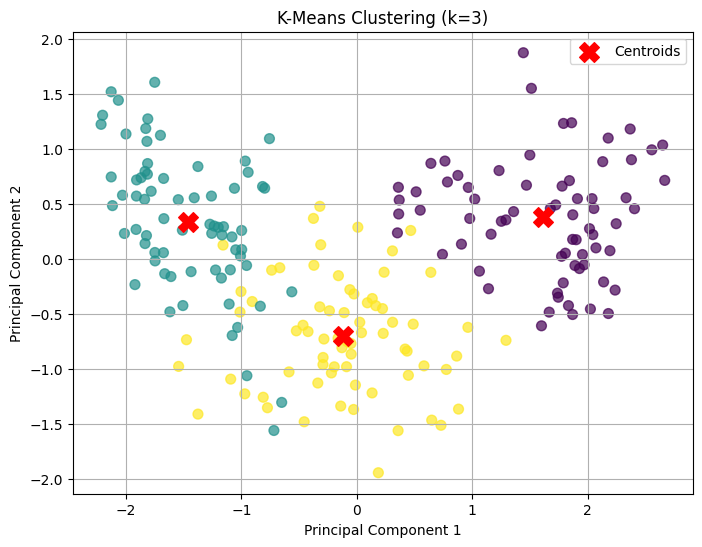

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={k_best})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# Hierarchical Clustering/Dendrograms

# DBSCAN

# Análisis